### Imports

In [1]:
import numpy as np, pandas as pd
import joblib, os
import matplotlib.pyplot as plt, seaborn as sns
sns.set_style("ticks")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
%load_ext autoreload
%autoreload 2
from scripts import farseeing, classifiers, utils

### Uncertainty-Aware Fall Detection
The test set is not segmented. `X_test` is the full 20-minute signal and `y_test` contains the fall points for each signal.

#### With 5-fold Cross-validation and Multiphase

In [2]:
# Tabular models
kwargs = dict(
	window_size=40, cv=5,
	segment_test=False,
	step=5, spacing=5,
	model_type='tabular'
)
tab_metric_df, tab_aggr_df = classifiers.cross_validate(
	farseeing, **kwargs)
tab_metric_df['model_type'] = 'tabular'
tab_aggr_df['model_type'] = 'tabular'



-- fold 1, testing on (8 subjects) --
Train set: X: (3244, 4000), y: (3244,) ([ADLs, Falls]) [2332  912]
Test set: X: 34, y: 34
⏳ TRAINING LogisticCV. RandomForest. ExtraTrees. ✅
🔍 TESTING LogisticCV. RandomForest. ExtraTrees. Ensemble. ✅


-- fold 2, testing on (8 subjects) --
Train set: X: (2006, 4000), y: (2006,) ([ADLs, Falls]) [1430  576]
Test set: X: 46, y: 46
⏳ TRAINING LogisticCV. RandomForest. ExtraTrees. ✅
🔍 TESTING LogisticCV. RandomForest. ExtraTrees. Ensemble. ✅


-- fold 3, testing on (8 subjects) --
Train set: X: (1633, 4000), y: (1633,) ([ADLs, Falls]) [1145  488]
Test set: X: 17, y: 17
⏳ TRAINING LogisticCV. RandomForest. ExtraTrees. ✅
🔍 TESTING LogisticCV. RandomForest. ExtraTrees. Ensemble. ✅


-- fold 4, testing on (8 subjects) --
Train set: X: (1237, 4000), y: (1237,) ([ADLs, Falls]) [877 360]
Test set: X: 18, y: 18
⏳ TRAINING LogisticCV. RandomForest. ExtraTrees. ✅
🔍 TESTING LogisticCV. RandomForest. ExtraTrees. Ensemble. ✅


-- fold 5, testing on (8 subjects) -

In [3]:
tab_metric_df

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,false alarm rate,miss rate,g,fold,Dataset,model_type
0,LogisticCV,40,0.091089,0.560597,0.21,0.121212,0.999981,0.153705,1.363625,2.636342,1.999499,0,FARSEEING,tabular
1,RandomForest,40,0.144047,0.651506,0.42,0.303030,0.999982,0.352054,1.272717,2.090892,1.999586,0,FARSEEING,tabular
2,ExtraTrees,40,0.429521,0.651507,0.43,0.303030,0.999984,0.355519,1.181808,2.090892,1.999590,0,FARSEEING,tabular
3,Ensemble,40,0.429521,0.651507,0.43,0.303030,0.999984,0.355519,1.181808,2.090892,1.999590,0,FARSEEING,tabular
4,LogisticCV,40,0.097441,0.546506,0.27,0.093023,0.999989,0.138373,0.767435,2.720908,1.999511,1,FARSEEING,tabular
5,RandomForest,40,0.146356,0.534879,0.23,0.069767,0.999990,0.107060,0.697669,2.790674,1.999503,1,FARSEEING,tabular
6,ExtraTrees,40,0.467847,0.523251,0.18,0.046512,0.999991,0.073922,0.627902,2.860441,1.999495,1,FARSEEING,tabular
7,Ensemble,40,0.467847,0.523251,0.17,0.046512,0.999990,0.073040,0.697669,2.860441,1.999492,1,FARSEEING,tabular
8,LogisticCV,40,0.094916,0.499996,0.00,0.000000,0.999993,0.000000,0.534940,3.031328,1.999472,2,FARSEEING,tabular
9,RandomForest,40,0.145285,0.558822,0.67,0.117647,0.999998,0.200149,0.178313,2.674701,1.999542,2,FARSEEING,tabular


In [18]:
tab_metric_df

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,false alarm rate,miss rate,fold,Dataset,model_type
0,LogisticCV,7,0.181381,0.847950,0.79,0.696970,0.998930,0.740575,0.545450,0.909083,0,FARSEEING,tabular
1,RandomForest,7,0.218970,0.953387,0.70,0.909091,0.997683,0.790960,1.181808,0.272725,0,FARSEEING,tabular
2,ExtraTrees,7,0.461257,0.862923,0.75,0.727273,0.998574,0.738462,0.727267,0.818175,0,FARSEEING,tabular
3,Ensemble,7,0.461257,0.893494,0.84,0.787879,0.999109,0.813105,0.454542,0.636358,0,FARSEEING,tabular
4,LogisticCV,7,0.370408,0.755677,0.92,0.511628,0.999726,0.657570,0.139534,1.465104,1,FARSEEING,tabular
5,RandomForest,7,0.231709,0.906566,0.85,0.813953,0.999179,0.831586,0.418601,0.558135,1,FARSEEING,tabular
6,ExtraTrees,7,1.176157,0.871819,0.89,0.744186,0.999453,0.810588,0.279067,0.767435,1,FARSEEING,tabular
7,Ensemble,7,1.176157,0.860260,0.91,0.720930,0.999590,0.804506,0.209301,0.837202,1,FARSEEING,tabular
8,LogisticCV,7,0.308070,0.899804,0.92,0.800000,0.999608,0.855814,0.199998,0.599995,2,FARSEEING,tabular
9,RandomForest,7,0.322989,0.899804,0.92,0.800000,0.999608,0.855814,0.199998,0.599995,2,FARSEEING,tabular


In [3]:
tab_metric_df

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,false alarm rate,miss rate,fold,Dataset,model_type
0,LogisticCV,7,0.117196,0.847950,0.79,0.696970,0.998930,0.740575,0.545450,0.909083,0,FARSEEING,tabular
1,RandomForest,7,0.170317,0.953387,0.70,0.909091,0.997683,0.790960,1.181808,0.272725,0,FARSEEING,tabular
2,ExtraTrees,7,0.481645,0.862923,0.75,0.727273,0.998574,0.738462,0.727267,0.818175,0,FARSEEING,tabular
3,Ensemble,7,0.481645,0.893494,0.84,0.787879,0.999109,0.813105,0.454542,0.636358,0,FARSEEING,tabular
4,LogisticCV,7,0.117875,0.755677,0.92,0.511628,0.999726,0.657570,0.139534,1.465104,1,FARSEEING,tabular
5,RandomForest,7,0.167221,0.906566,0.85,0.813953,0.999179,0.831586,0.418601,0.558135,1,FARSEEING,tabular
6,ExtraTrees,7,0.491049,0.871819,0.89,0.744186,0.999453,0.810588,0.279067,0.767435,1,FARSEEING,tabular
7,Ensemble,7,0.491049,0.860260,0.91,0.720930,0.999590,0.804506,0.209301,0.837202,1,FARSEEING,tabular
8,LogisticCV,7,0.114543,0.899804,0.92,0.800000,0.999608,0.855814,0.199998,0.599995,2,FARSEEING,tabular
9,RandomForest,7,0.162831,0.899804,0.92,0.800000,0.999608,0.855814,0.199998,0.599995,2,FARSEEING,tabular


In [19]:
# ts models
kwargs = dict(
	window_size=7, cv=5,
	segment_test=False,
	multiphase=True,
	model_type='ts'
)
ts_metric_df, ts_aggr_df = classifiers.cross_validate(
	farseeing, **kwargs)
ts_metric_df['model_type'] = 'ts'
ts_aggr_df['model_type'] = 'ts'



-- fold 1, testing on (8 subjects) --
Train set: X: (2638, 700), y: (2638,) ([ADLs, Falls]) [2524  114]
Test set: X: 34, y: 34
⏳ TRAINING Rocket. Catch22. QUANT. ✅
🔍 TESTING Rocket. Catch22. QUANT. Ensemble. ✅


-- fold 2, testing on (8 subjects) --
Train set: X: (1659, 700), y: (1659,) ([ADLs, Falls]) [1587   72]
Test set: X: 46, y: 46
⏳ TRAINING Rocket. Catch22. QUANT. ✅
🔍 TESTING Rocket. Catch22. QUANT. Ensemble. ✅


-- fold 3, testing on (8 subjects) --
Train set: X: (1352, 700), y: (1352,) ([ADLs, Falls]) [1291   61]
Test set: X: 17, y: 17
⏳ TRAINING Rocket. Catch22. QUANT. ✅
🔍 TESTING Rocket. Catch22. QUANT. Ensemble. ✅


-- fold 4, testing on (8 subjects) --
Train set: X: (1136, 700), y: (1136,) ([ADLs, Falls]) [1091   45]
Test set: X: 18, y: 18
⏳ TRAINING Rocket. Catch22. QUANT. ✅
🔍 TESTING Rocket. Catch22. QUANT. Ensemble. ✅


-- fold 5, testing on (8 subjects) --
Train set: X: (815, 700), y: (815,) ([ADLs, Falls]) [790  25]
Test set: X: 29, y: 29
⏳ TRAINING Rocket. Catch22.

In [20]:
ts_metric_df

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,false alarm rate,miss rate,fold,Dataset,model_type
0,Rocket,7,10.450395,0.847594,0.70,0.696970,0.998217,0.698482,0.909083,0.909083,0,FARSEEING,ts
1,Catch22,7,22.498839,0.846970,0.57,0.696970,0.996970,0.627123,1.545442,0.909083,0,FARSEEING,ts
2,QUANT,7,11.097072,0.939216,0.94,0.878788,0.999643,0.908364,0.181817,0.363633,0,FARSEEING,ts
3,Ensemble,7,11.097072,0.878342,0.83,0.757576,0.999109,0.792136,0.454542,0.727267,0,FARSEEING,ts
4,Rocket,7,11.846934,0.883037,0.77,0.767442,0.998632,0.768719,0.697669,0.697669,1,FARSEEING,ts
5,Catch22,7,22.946866,0.871751,0.86,0.744186,0.999316,0.797912,0.348834,0.767435,1,FARSEEING,ts
6,QUANT,7,5.011100,0.953215,0.91,0.906977,0.999453,0.908486,0.279067,0.279067,1,FARSEEING,ts
7,Ensemble,7,5.011100,0.895212,0.94,0.790698,0.999726,0.858909,0.139534,0.627902,1,FARSEEING,ts
8,Rocket,7,11.830670,0.966471,0.93,0.933333,0.999608,0.931664,0.199998,0.199998,2,FARSEEING,ts
9,Catch22,7,22.365525,0.766667,1.00,0.533333,1.000000,0.695652,0.000000,1.399988,2,FARSEEING,ts


In [5]:
ts_metric_df

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,false alarm rate,miss rate,fold,Dataset,model_type
0,Rocket,7,8.015178,0.847594,0.70,0.696970,0.998217,0.698482,0.909083,0.909083,0,FARSEEING,ts
1,Catch22,7,10.063791,0.846970,0.57,0.696970,0.996970,0.627123,1.545442,0.909083,0,FARSEEING,ts
2,QUANT,7,4.626728,0.939216,0.94,0.878788,0.999643,0.908364,0.181817,0.363633,0,FARSEEING,ts
3,Ensemble,7,4.626728,0.878342,0.83,0.757576,0.999109,0.792136,0.454542,0.727267,0,FARSEEING,ts
4,Rocket,7,8.426421,0.883037,0.77,0.767442,0.998632,0.768719,0.697669,0.697669,1,FARSEEING,ts
5,Catch22,7,8.727821,0.871751,0.86,0.744186,0.999316,0.797912,0.348834,0.767435,1,FARSEEING,ts
6,QUANT,7,4.807555,0.953215,0.91,0.906977,0.999453,0.908486,0.279067,0.279067,1,FARSEEING,ts
7,Ensemble,7,4.807555,0.895212,0.94,0.790698,0.999726,0.858909,0.139534,0.627902,1,FARSEEING,ts
8,Rocket,7,8.937791,0.966471,0.93,0.933333,0.999608,0.931664,0.199998,0.199998,2,FARSEEING,ts
9,Catch22,7,10.948471,0.766667,1.00,0.533333,1.000000,0.695652,0.000000,1.399988,2,FARSEEING,ts


In [21]:
# save all dfs
all_metric_df = pd.concat([tab_metric_df, ts_metric_df], ignore_index=True)
all_aggr_df = pd.concat([tab_aggr_df, ts_aggr_df], ignore_index=True)
all_metric_df.to_csv('results/farseeing_all_metric_df_7_2sec.csv', index=False)
all_aggr_df.to_csv('results/farseeing_all_aggr_df_7_2sec.csv', index=False)

In [22]:
load_path = 'results/farseeing_all_metric_df_7_2sec.csv'
all_metric_df = pd.read_csv(load_path)
tab_metric_df = all_metric_df[all_metric_df['model_type'] == 'tabular']
ts_metric_df = all_metric_df[all_metric_df['model_type'] == 'ts']

In [23]:
tab_metric_df.replace({'model': {'Ensemble': 'Tabular Ensemble'}}, inplace=True)
ts_metric_df.replace({'model': {'Ensemble': 'TS Ensemble'}}, inplace=True)
all_metric_df = pd.concat([tab_metric_df, ts_metric_df], ignore_index=True)

/tmp/ipykernel_3199078/1827662966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tab_metric_df.replace({'model': {'Ensemble': 'Tabular Ensemble'}}, inplace=True)
/tmp/ipykernel_3199078/1827662966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_metric_df.replace({'model': {'Ensemble': 'TS Ensemble'}}, inplace=True)


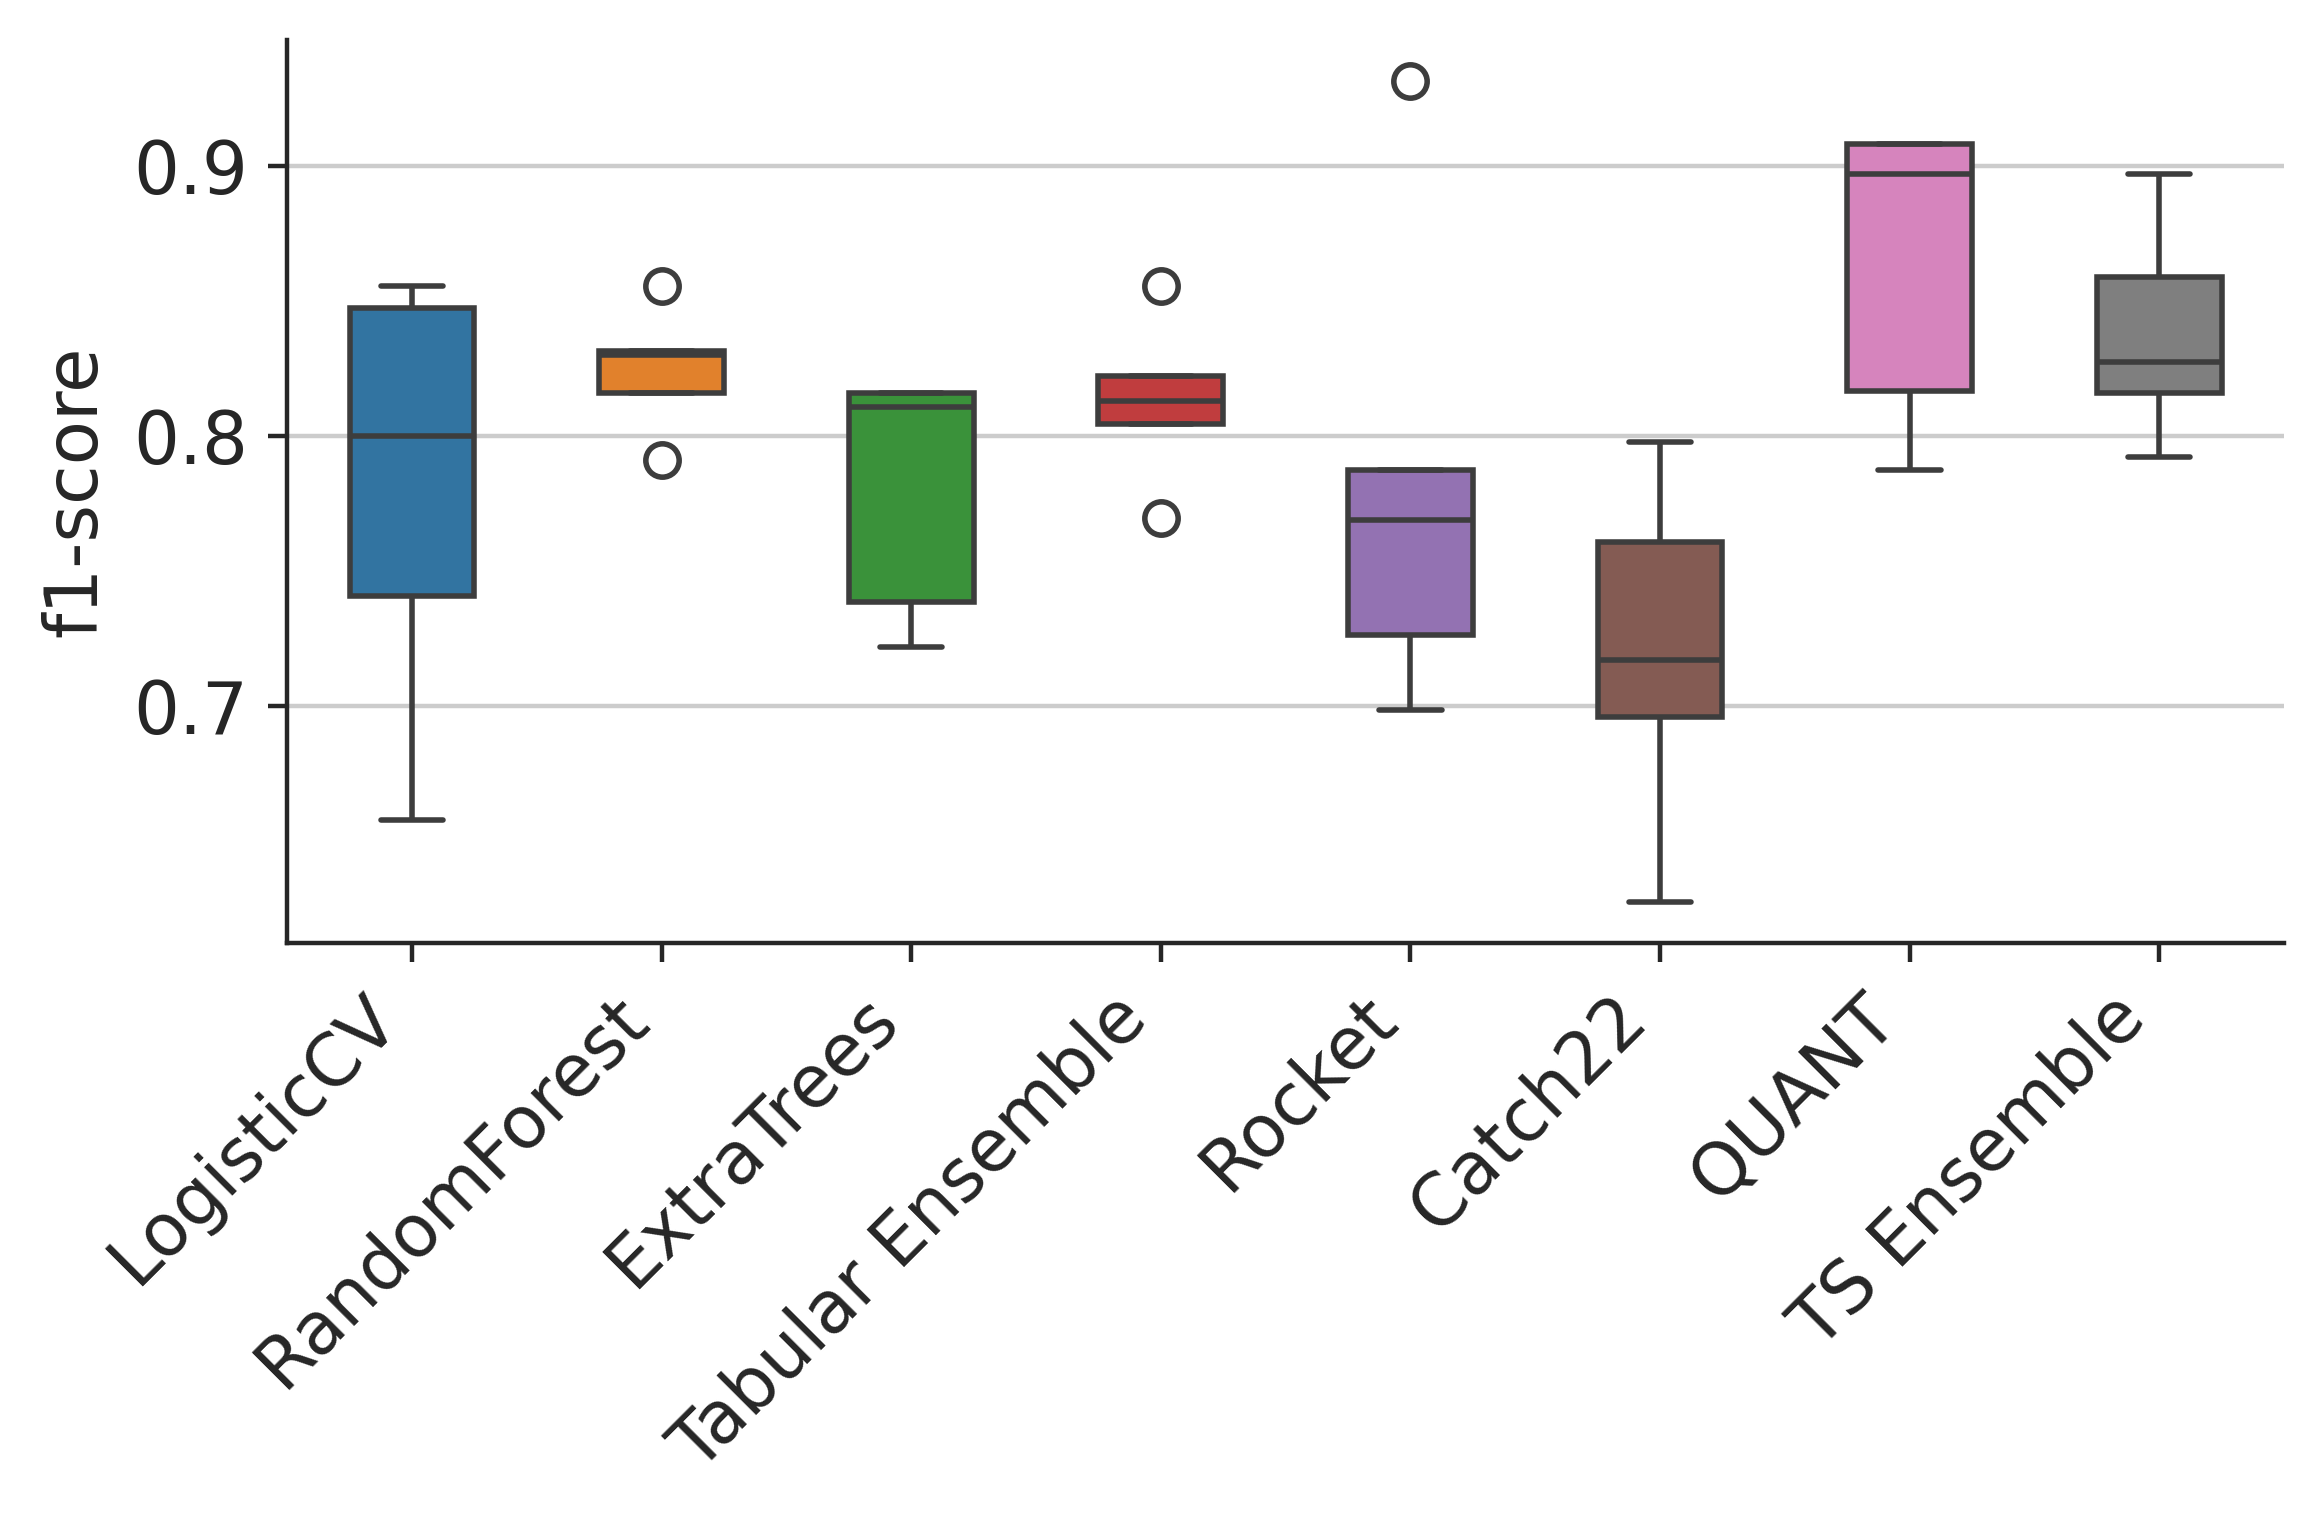

In [24]:
utils.summary_visualization([all_metric_df], name='all_models')

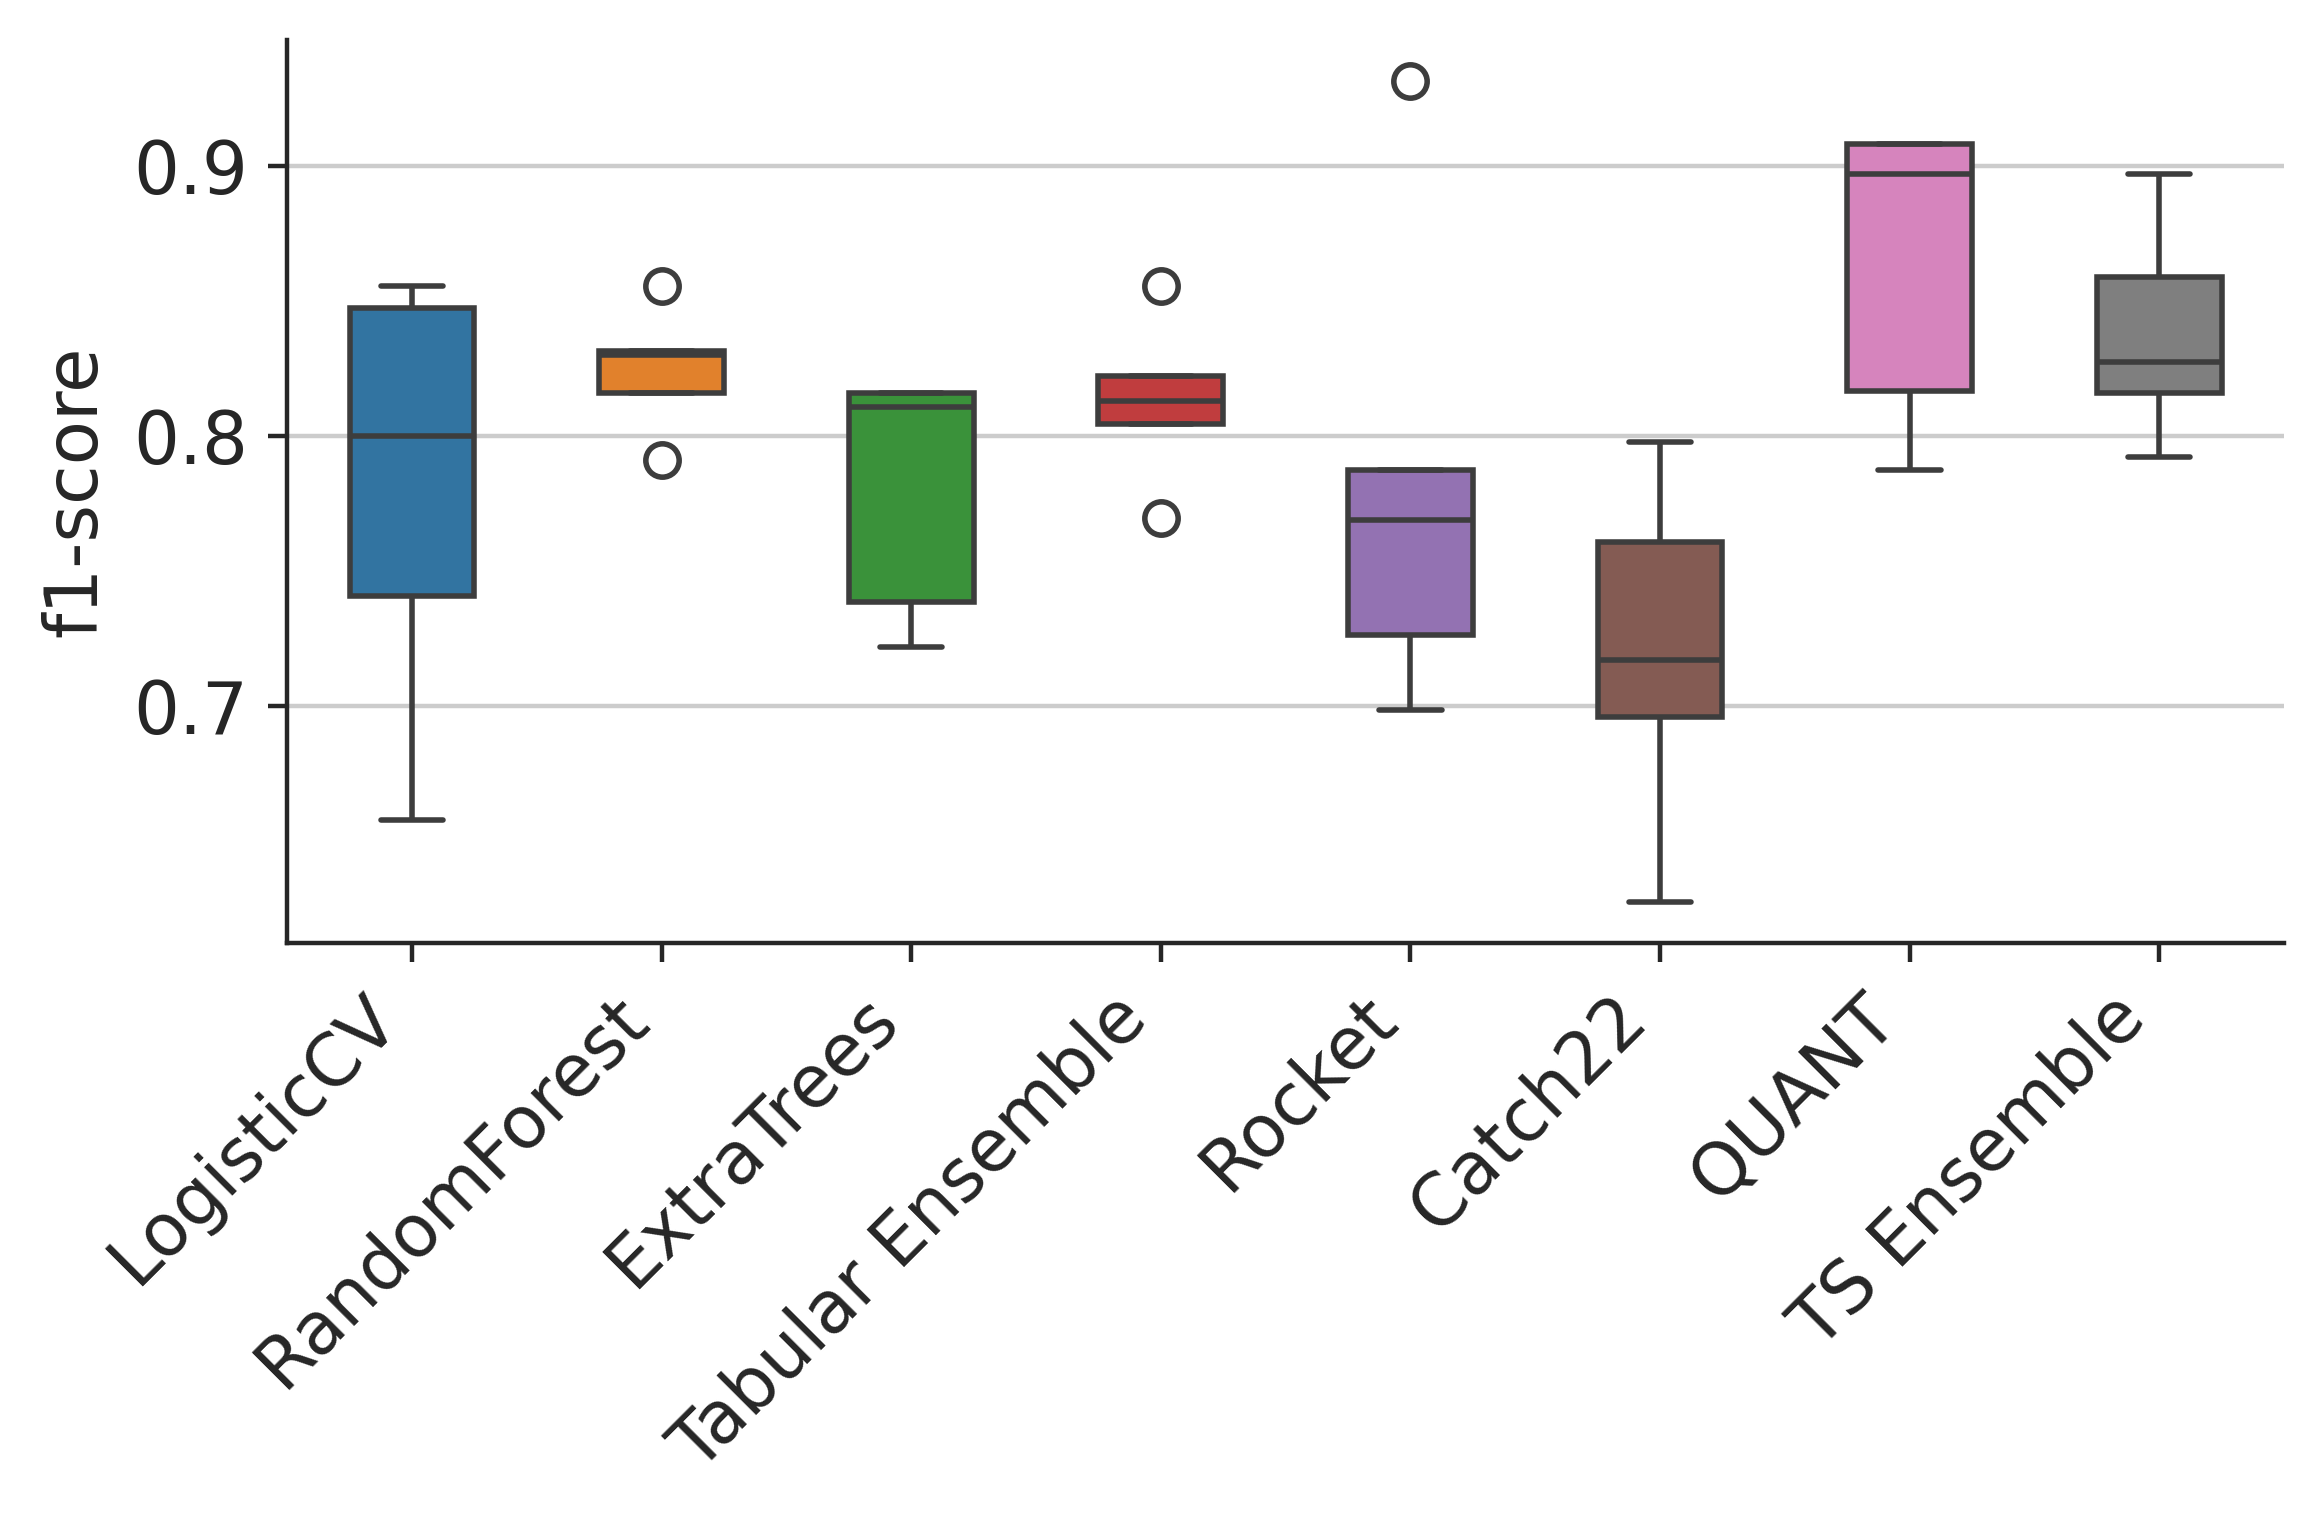

In [9]:
utils.summary_visualization([all_metric_df], name='all_models')

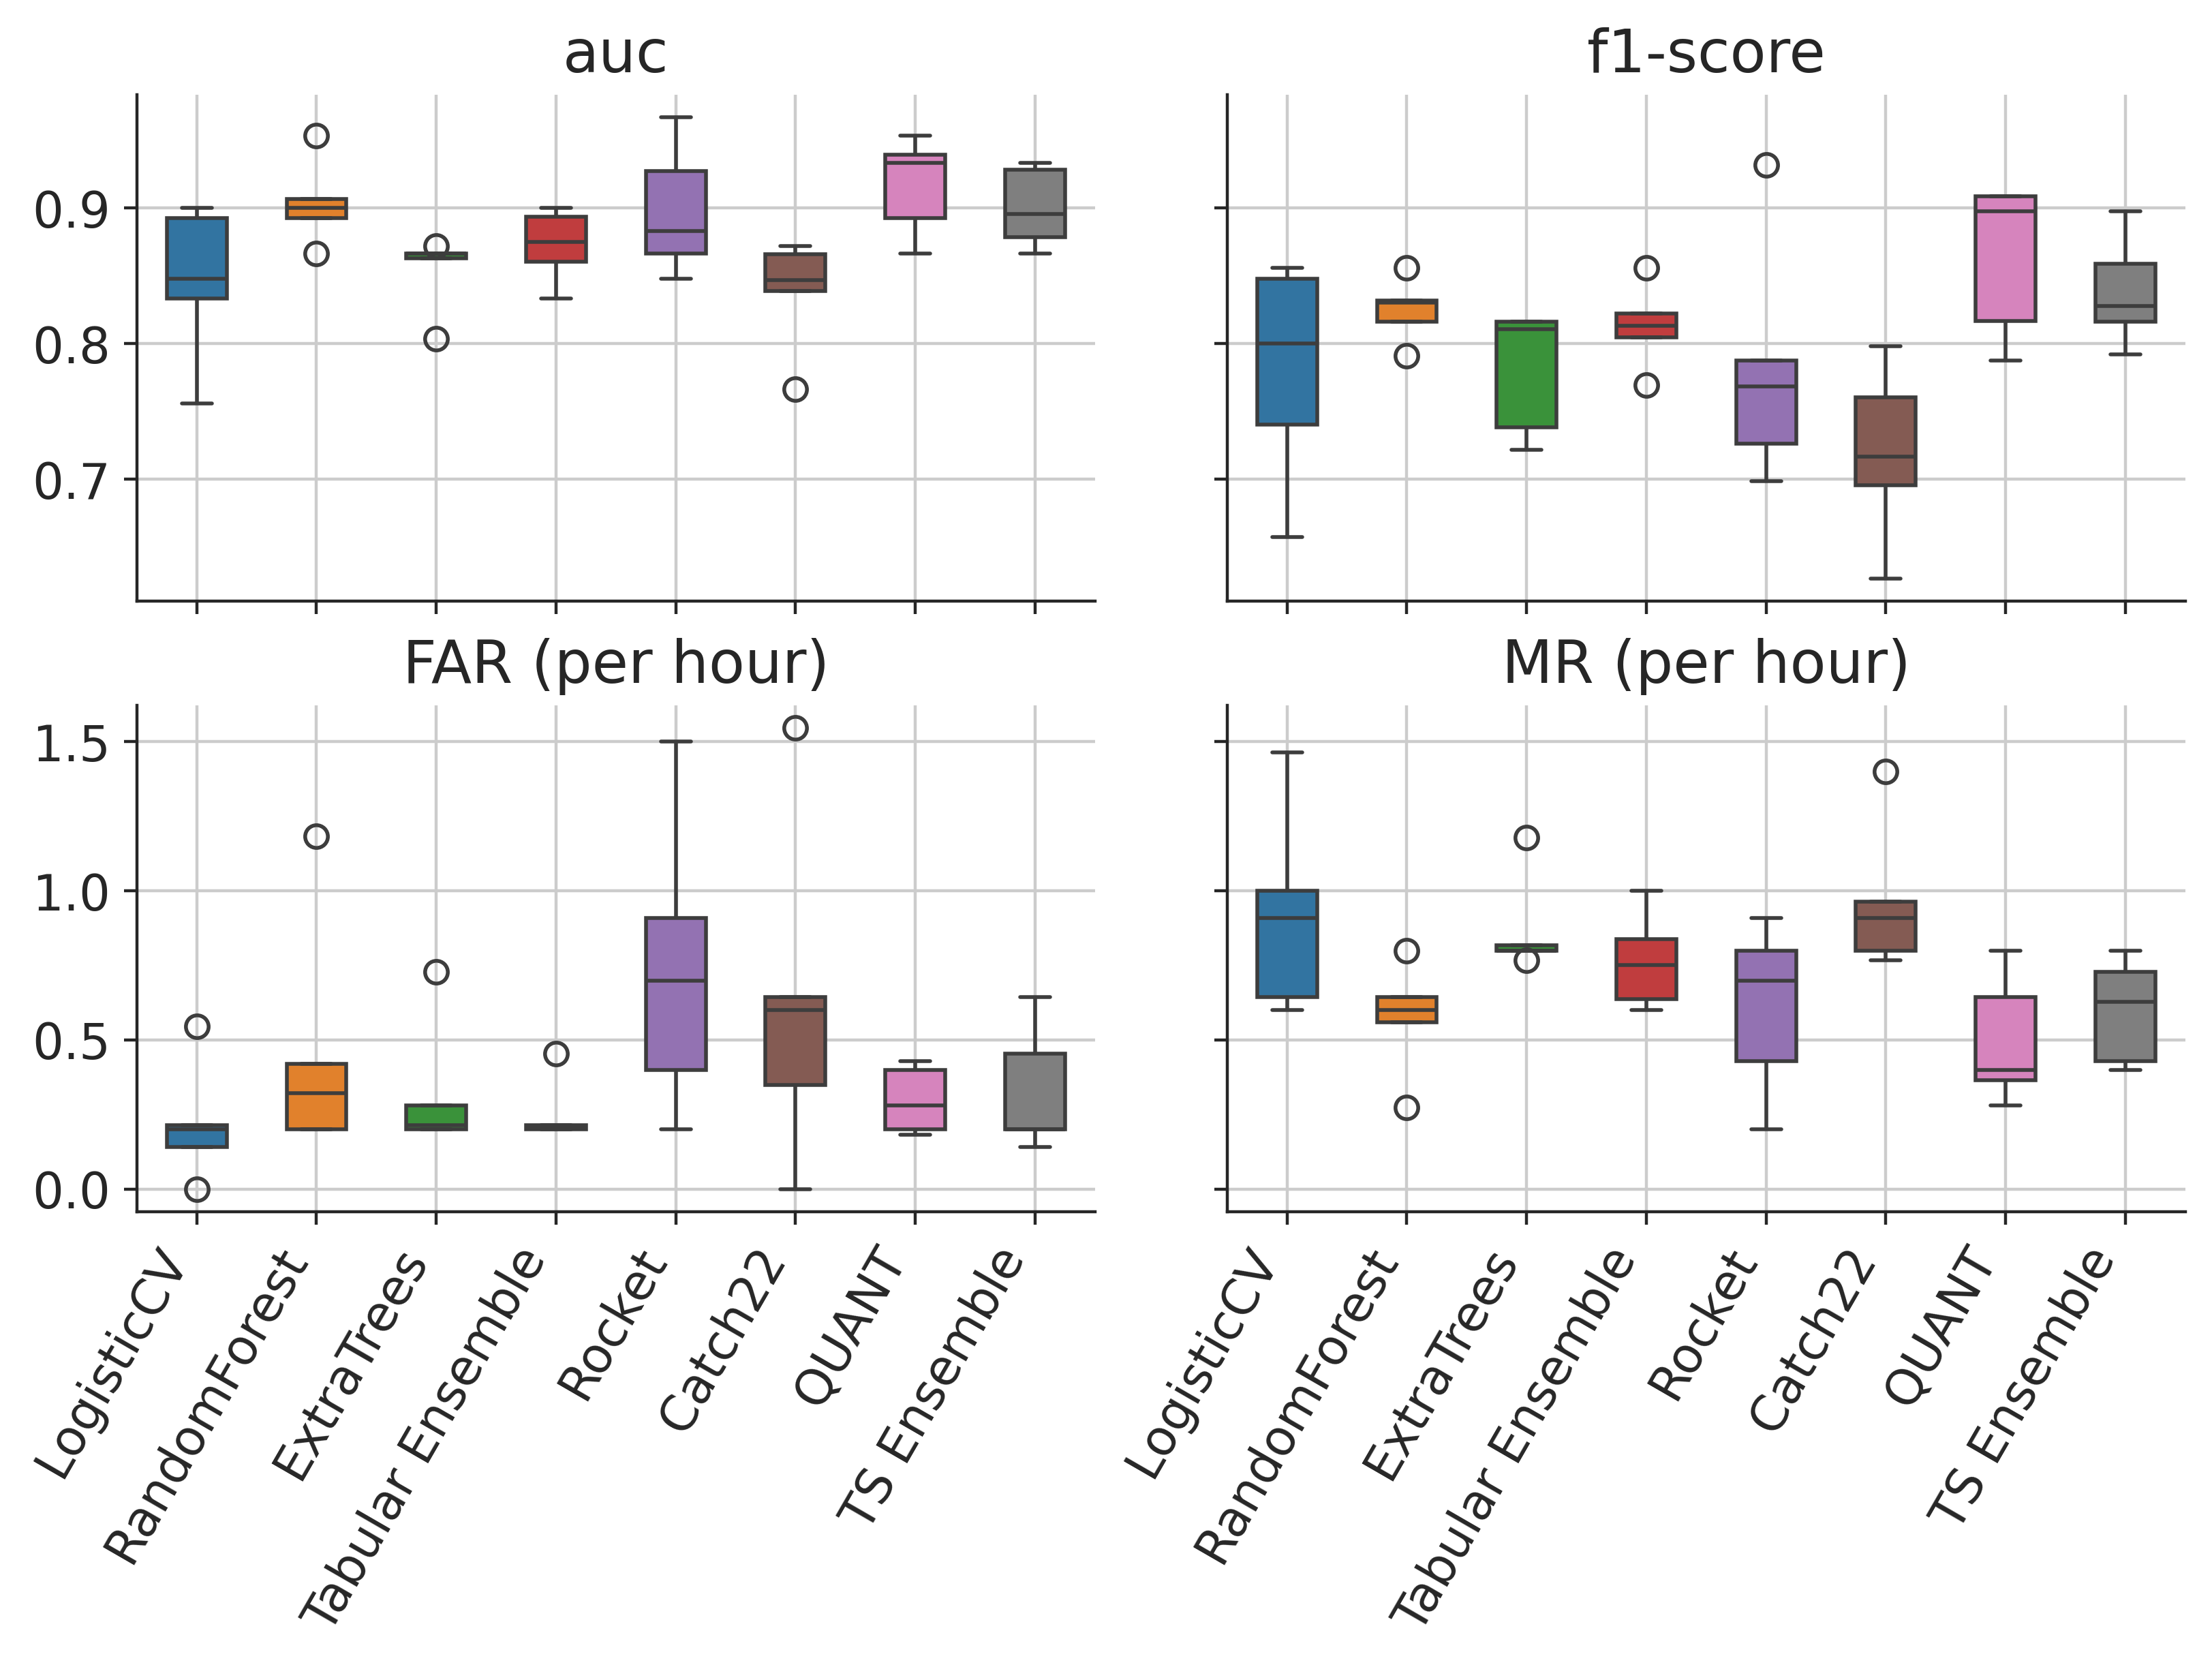

In [27]:
metrics = ['auc', 'f1-score',
           'false alarm rate', 'miss rate']
utils.visualise_all_metrics(all_metric_df, metrics=metrics)

#### Cost-sensitive

In [ ]:
kwargs = dict(
	window_size=7,
    multiphase=True,
	segment_test=False,
	tune_threshold=True)
dataset = utils.train_test_subjects_split(
    farseeing, **kwargs)

Train set: X: (3426, 700), y: (3426,)        ([ADLs, Falls]) [3314  112]
Test set: X: 34, y: 34


In [50]:
metrics_df = []
for t in [False, True]:
    kwargs['tune_threshold'] = t
    for model_type in ['tabular', 'ts']:
        kwargs['model_type'] = model_type
        df = classifiers.run_models(*dataset, **kwargs)
        df['threshold'] = 'auto' if t else 'default'
        df['model_type'] = model_type
        metrics_df.append(df)
metrics_df = pd.concat(metrics_df, ignore_index=True)
metrics_df.to_csv('results/farseeing_tune_threshold_7sec.csv', index=False)

⏳ TRAINING LogisticCV. RandomForest. ExtraTrees. ✅
🔍 TESTING LogisticCV. RandomForest. ExtraTrees. Ensemble. ✅
⏳ TRAINING Rocket. Catch22. QUANT. ✅
🔍 TESTING Rocket. Catch22. QUANT. Ensemble. ✅
⏳ TRAINING LogisticCV. thresh: 0.16161691318914526 RandomForest. thresh: 0.18168350168350167 ExtraTrees. thresh: 0.16161616161616163 ✅
🔍 TESTING LogisticCV. RandomForest. ExtraTrees. Ensemble. ✅
⏳ TRAINING Rocket. thresh: 0.010101010101010102 Catch22. thresh: 0.2351515151515151 QUANT. thresh: 0.15151515151515152 ✅
🔍 TESTING Rocket. Catch22. QUANT. Ensemble. ✅


In [51]:
metrics_df.sort_values(by=['model'])

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,false alarm rate,miss rate,g,threshold,model_type
5,Catch22,7,14.958785,0.818181,0.88,0.636364,0.999999,0.738609,0.272725,1.090900,0.999960,default,ts
13,Catch22,7,13.526259,0.939393,0.76,0.878788,0.999998,0.815089,0.818175,0.363633,0.999977,auto,ts
3,Ensemble,7,0.486733,0.924242,0.93,0.848485,0.999999,0.887374,0.181817,0.454542,0.999978,default,tabular
7,Ensemble,7,4.385530,0.909090,0.87,0.818182,0.999999,0.843296,0.363633,0.545450,0.999974,default,ts
11,Ensemble,7,0.496507,0.924242,0.93,0.848485,0.999999,0.887374,0.181817,0.454542,0.999978,auto,tabular
15,Ensemble,7,4.277760,0.909090,0.87,0.818182,0.999999,0.843296,0.363633,0.545450,0.999974,auto,ts
2,ExtraTrees,7,0.486733,0.939394,0.94,0.878788,0.999999,0.908364,0.181817,0.363633,0.999981,default,tabular
10,ExtraTrees,7,0.496507,0.984847,0.74,0.969697,0.999997,0.839419,0.999992,0.090908,0.999984,auto,tabular
0,LogisticCV,7,0.112976,0.863636,0.83,0.727273,0.999999,0.775248,0.454542,0.818175,0.999966,default,tabular
8,LogisticCV,7,0.110776,0.939393,0.74,0.878788,0.999997,0.803444,0.909083,0.363633,0.999977,auto,tabular


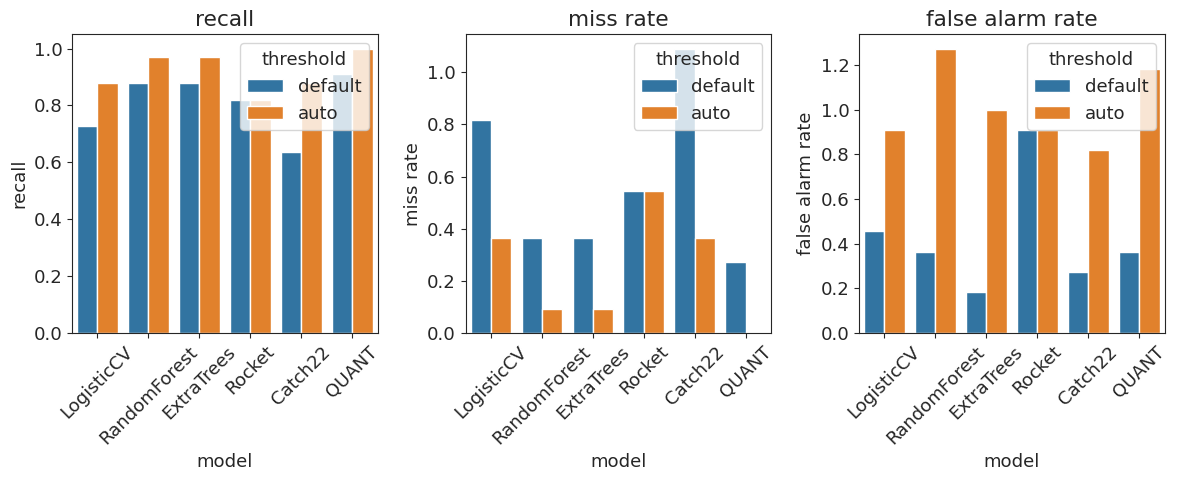

In [57]:
# drop ensemble rows
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
metrics_df2 = metrics_df[~metrics_df['model'].str.contains('Ensemble')]
for i, m in enumerate(['recall', 'miss rate', 'false alarm rate']):
	sns.barplot(data=metrics_df2, x='model', y=m, hue='threshold', ax=ax[i])
	ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
	ax[i].set_title(m)
plt.tight_layout()
# plt.xticks(rotation=45, ha='left')
plt.show()

In [42]:
metrics_df.sort_values(by=['model'])

,model,window_size,runtime,auc,precision,recall,specificity,f1-score,false alarm rate,miss rate,g,threshold,model_type
5,Catch22,7,13.527374,0.818181,0.88,0.636364,0.999999,0.738609,0.272725,1.090900,359967.545725,default,ts
13,Catch22,7,27.137643,0.939393,0.76,0.878788,0.999998,0.815089,0.818175,0.363633,359973.727492,auto,ts
3,Ensemble,7,0.462941,0.924242,0.93,0.848485,0.999999,0.887374,0.181817,0.454542,359974.091125,default,tabular
7,Ensemble,7,4.939187,0.909090,0.87,0.818182,0.999999,0.843296,0.363633,0.545450,359972.818408,default,ts
11,Ensemble,7,0.465673,0.924242,0.93,0.848485,0.999999,0.887374,0.181817,0.454542,359974.091125,auto,tabular
15,Ensemble,7,5.218937,0.909090,0.87,0.818182,0.999999,0.843296,0.363633,0.545450,359972.818408,auto,ts
2,ExtraTrees,7,0.462941,0.939394,0.94,0.878788,0.999999,0.908364,0.181817,0.363633,359975.000208,default,tabular
10,ExtraTrees,7,0.465673,0.984847,0.74,0.969697,0.999997,0.839419,0.999992,0.090908,359976.091108,auto,tabular
0,LogisticCV,7,0.132997,0.863636,0.83,0.727273,0.999999,0.775248,0.454542,0.818175,359969.909342,default,tabular
8,LogisticCV,7,0.127491,0.939393,0.74,0.878788,0.999997,0.803444,0.909083,0.363633,359973.545675,auto,tabular


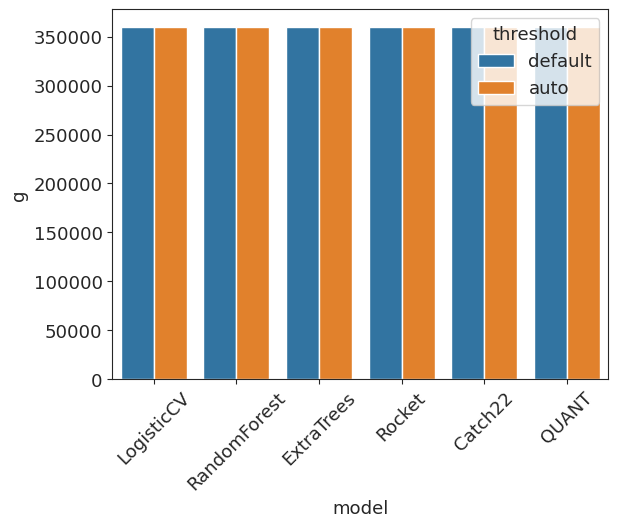

In [46]:
# drop ensemble rows
metrics_df2 = metrics_df[~metrics_df['model'].str.contains('Ensemble')]
sns.barplot(data=metrics_df2, x='model', y='g', hue='threshold')
plt.xticks(rotation=45)
plt.show()